In [1]:
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
data=pd.read_csv('/Users/sunilhariharan/Downloads/data science/datasets/Mall_Customers.csv')

In [3]:
data.drop('CustomerID',axis=1,inplace=True)

In [4]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
num=data.select_dtypes(include=np.number)

In [6]:
num

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(num)

In [8]:
from sklearn.preprocessing import MinMaxScaler
mi=MinMaxScaler()
scaled=mi.fit_transform(num)

In [9]:
cols=num.columns.tolist()

In [10]:
final_num=pd.DataFrame(scaled,columns=cols)

In [11]:
cat=data.select_dtypes(exclude=np.number)

In [12]:
final_cat=pd.get_dummies(cat,drop_first=True)

In [13]:
final=pd.concat([final_num,final_cat],axis=1)

In [14]:
# k means determine k
from sklearn.cluster import KMeans
distortions = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(final)
    distortions.append(kmeanModel.inertia_)

In [15]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(final_num)
    distortions.append(kmeanModel.inertia_)

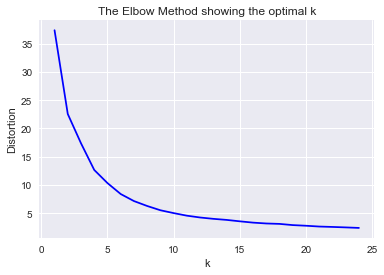

In [16]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
km = KMeans(init="random", n_clusters=5)
km.fit(final_num)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
km.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 1, 0, 1, 4, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       0, 1, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 2, 2, 4, 2, 3, 2, 3, 2, 3, 2,
       4, 2, 4, 2, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [19]:
ar=km.labels_

In [20]:
data['cluster']=ar

In [21]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4
5,Female,22,17,76,1
6,Female,35,18,6,4
7,Female,23,18,94,1
8,Male,64,19,3,0
9,Female,30,19,72,1


In [22]:
data1=pd.get_dummies(data,drop_first=True)

In [23]:
data.groupby('cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,55.551724,48.482759,41.775862
1,25.521739,26.304348,78.565217
2,32.875000,86.100000,81.525000
3,44.000000,90.133333,17.933333
4,27.061224,51.979592,41.040816


In [24]:
data.groupby('cluster').median()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,53.5,49.0,46.0
1,24.0,25.0,77.0
2,32.0,78.5,83.0
3,43.5,87.0,16.5
4,26.0,57.0,42.0
